<a href="https://colab.research.google.com/github/EmilyB78/Titanic-Data-Analysis/blob/master/Titanic_Survivor_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

This project examines factors affecting survival among passengers aboard Titanic. 

In [12]:
survivor_data = pd.read_csv('titanic_data.csv')
survivor_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


DISTRIBUTION PLOT

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


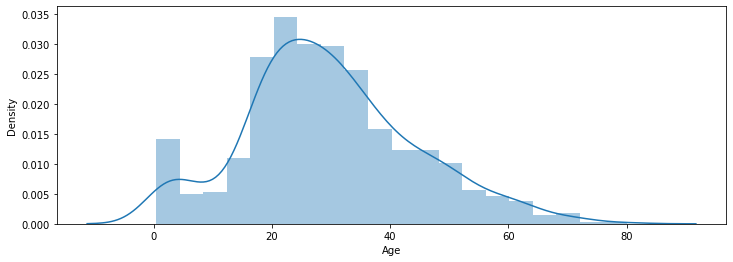

In [13]:
fig, ax = plt.subplots(figsize=(12,4))

sns.distplot(survivor_data.Age, ax=ax)

SCATTER PLOT

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


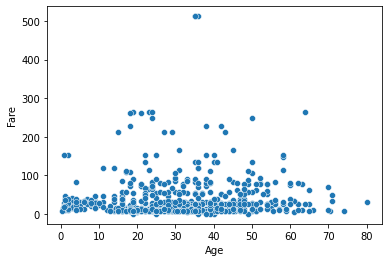

In [14]:
sns.scatterplot ('Age', 'Fare', data=survivor_data)


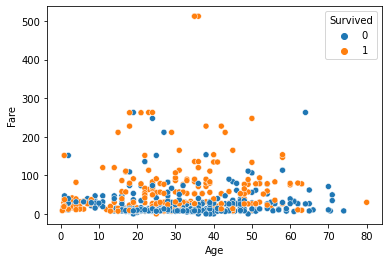

In [15]:
sns.scatterplot(x='Age', y= 'Fare', data=survivor_data, hue= 'Survived')


Age and the cost of the passenger's fare does not appear to be related. However, those who paid a higher fare were more likely to survive. 

BAR PLOT

Text(0.5, 1.0, 'Survival by Age and Gender')

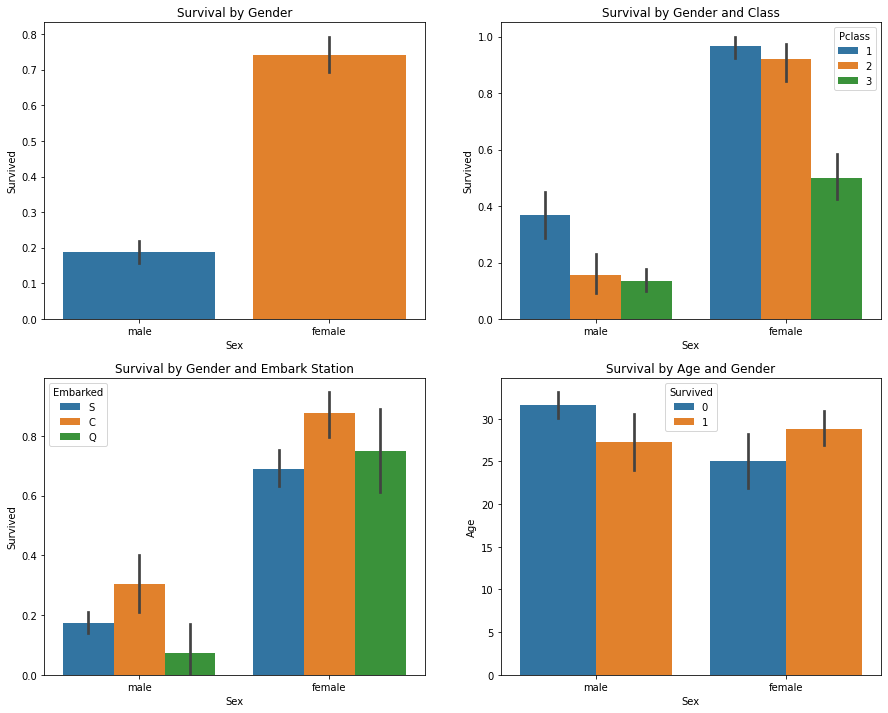

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,12))

sns.barplot(x='Sex', y= 'Survived', data=survivor_data, ax=axes[0,0])
axes[0,0].set_title ('Survival by Gender')

sns.barplot(x='Sex', y= 'Survived', data=survivor_data, ax=axes[0,1], hue= 'Pclass')
axes[0,1].set_title('Survival by Gender and Class')

sns.barplot(x='Sex', y= 'Survived', data=survivor_data, ax=axes[1,0], hue= 'Embarked')
axes[1,0].set_title('Survival by Gender and Embark Station')

sns.barplot(x='Sex', y= 'Age', data=survivor_data, ax=axes[1,1], hue= 'Survived')
axes[1,1].set_title('Survival by Age and Gender')


This analysis shows an interesting fact. Surival was strongly influenced by gender and passenger class. Women and those in lower passenger class (1st) were far more likely to survive. In examining the effect of age on survival, we see that the average age of male survivors was younger than decedents. The opposite is true among women. 

FACTOR PLOT

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


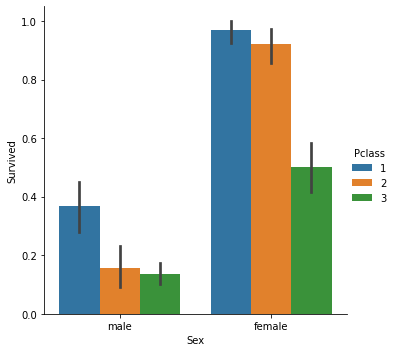

In [17]:
sns.factorplot(x='Sex', y='Survived', hue='Pclass', data=survivor_data, kind='bar')

COUNT PLOT

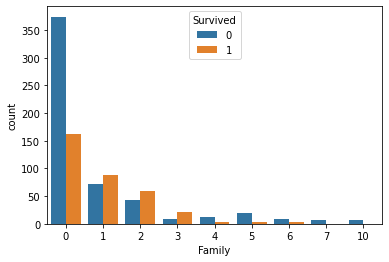

In [35]:
companion_merge = survivor_data['Family'] = survivor_data['SibSp'] + survivor_data['Parch']


# run chart using combined category to assess everyone who was not traveling alone.
sns.countplot(x='Family',data=survivor_data, hue= 'Survived' )

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


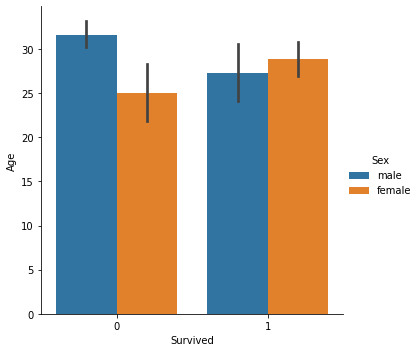

In [19]:
sns.factorplot(x='Survived', y='Age', hue='Sex', data=survivor_data, kind='bar')

**Data Cleaning**

In [20]:
survivor_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Identifying Null Values

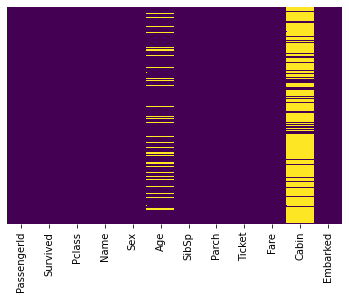

In [21]:
sns.heatmap(survivor_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

A significant number of null values are located the age column.

BOX PLOT

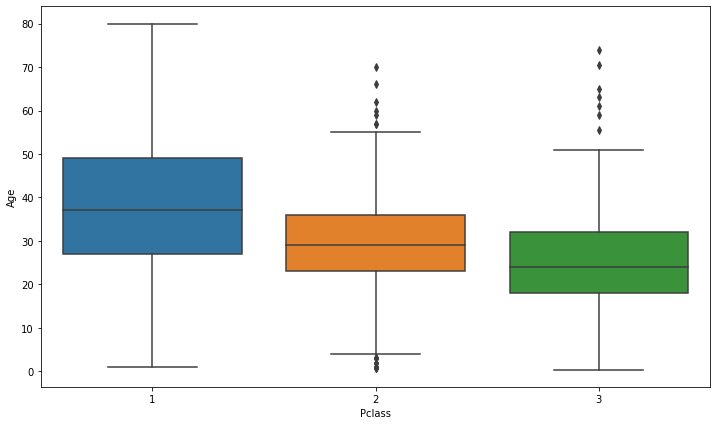

In [22]:
plt.figure(figsize=(12,7))

sns.boxplot(x= 'Pclass', y= 'Age', data= survivor_data)

It appears that the average age of the passenger increases as the passenger class decreases. We will use the average age of the passenger class to fill in missing age data.

In [23]:
survivor_data[survivor_data['Pclass']=='1']['Age'].mean()

nan

In [38]:
def impute_age(cols):
    Age = cols(0)
    Pclass = cols(1)
    
    if pd.isNull(Age):
        
        if Pclass == 1:
            return 38
        
        elif Pclass == 2:
            return 30
        
        else:
            return 24
    else: 
        return Age


survivor_data['Age'] =[['Age', 'Pclass']].apply(impute_age, axis=1) 


AttributeError: ignored

Apply to data. 

In [25]:
survivor_data['Age'] =[['Age', 'Pclass']].apply(impute_age, axis=1)

AttributeError: ignored